# 한신대학교 e-비즈니스학과 201646006 이성범 PD학기제

## 분류 실습

분류 부분의 실습을 진행한 파일이다.

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [ ]:
# 데이터 시각화 전용 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline
 
%config InlineBackend.figure_format = 'retina'  # 레티나 디스플레이 지원을 통해 한글을 선명하게 보여줌
 
!apt -qq -y install fonts-nanum                 # 상기 라이브러리에 폰트 설치 
                                                # 이하 기본 폰트가 되도록 설정
# 한글 폰트를 사용할 수 있게 만들어줌
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='NanumBarunGothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
paths = '/content/drive/MyDrive/PD학기제/Week3, Classification/'

credit = pd.read_csv(paths + "Credit-Card-Fraud-Detection.csv")

In [ ]:
credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,0.394940,1.935899,-0.359235,1.822466,-0.054693,0.857551,-0.053336,0.529098,0.159752,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,-1.159036,0.719861,0.622591,-0.157846,-0.373298,-0.515740,-0.117206,-0.569763,0.644970,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,-0.703073,0.588971,-0.146823,-0.181353,-0.690156,-0.028327,0.410035,-0.828869,-0.885471,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,1.136838,0.648191,-0.468076,1.016010,0.206836,-0.138604,-0.066788,0.459306,0.663398,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,-1.352709,-0.995678,-0.887039,0.732821,-0.557246,-2.412225,0.200509,0.823963,-0.531789,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


# 데이터 분포

In [ ]:
features = credit.iloc[:, :-1]
target = credit.iloc[:, -1]

## feature 분포

In [ ]:
pd.set_option('display.max_columns', 40)
features.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,0.033738,-0.047544,0.014048,-0.053556,-0.011562,-0.031559,-0.045020,-0.005966,0.007183,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,1.096583,1.208918,0.995720,1.193859,0.916783,1.000876,1.186014,0.892478,0.827420,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,-4.339319,-18.431131,-3.844974,-19.214325,-3.894020,-13.303888,-24.019099,-9.335193,-4.619034,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,-0.748920,-0.421077,-0.633399,-0.449537,-0.597618,-0.478844,-0.494037,-0.497440,-0.459073,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,-0.010467,0.137410,-0.003826,0.037809,0.041502,0.059667,-0.067213,-0.000928,0.002111,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,0.760396,0.612790,0.675571,0.485859,0.637263,0.517753,0.403942,0.514982,0.467781,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,12.018913,4.574082,3.685570,7.667726,3.680272,6.098529,9.207059,4.054462,5.228342,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133


전체적으로 feature들 간의 스케일 차이가 존재하고 이상치들이 많이 존재한다고 생각된다. 

따라서 표준화를 통해서 분산을 1로 만들어주는 것 보디는 정규화를 통해서 전체적인 스케일을 맞추는 것이 더 바람직하다고 생각되며 정규화를 진행해줄 예정이다.

## target 분포

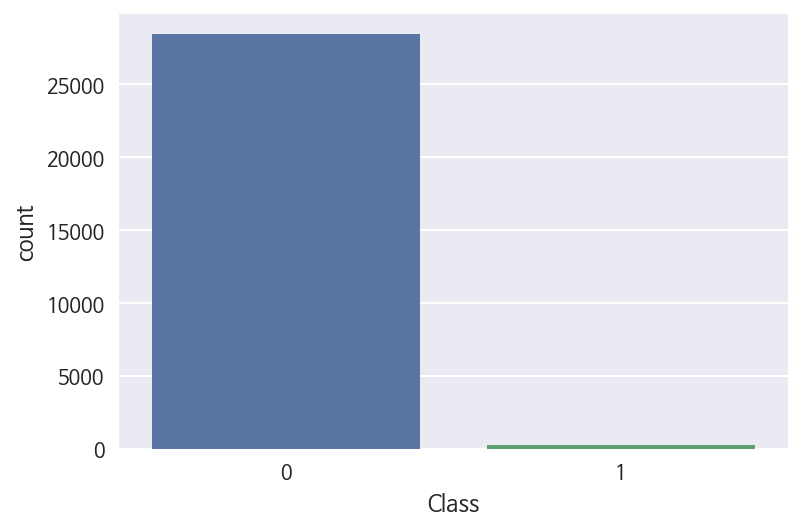

In [ ]:
sns.countplot(target)

In [ ]:
zero_percent = target.value_counts()[0] / target.count() * 100
one_percent = target.value_counts()[1] / target.count() * 100

print(f'전체 데이터 대비 0의 비율: {zero_percent:.2f}')
print(f'전체 데이터 대비 1의 비율: {one_percent:.2f}')

전체 데이터 대비 0의 비율: 99.14
전체 데이터 대비 1의 비율: 0.86


target의 분포를 보면 매우 불균형하다는 것을 확인할 수 있다.

따라서 앞으로 모델의 성능을 평가할 때 정확도의 경우 좋은 성능 평가 지표가 될수 없다고 생각된다.

왜냐하면 모델이 모든 데이터를 0으로 평가하여도 정확도 성능 지표의 경우에는 99.14의 높은 값을 가지기 때문이다.

따라서 앞으로 모델 성능 평가 지표의 경우 정확도가 아닌 정밀도, 재현율, F1_Score, AUC 등의 성능 평가 지표를 사용할 예정이다.

또한 데이터를 나눌때 stratify하게 나눠 train과 test가 동일한 class 값을 값도록 할 예정이다.

# Model

## 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 11, stratify = target)

Text(0.5, 1.0, 'test의 분포')

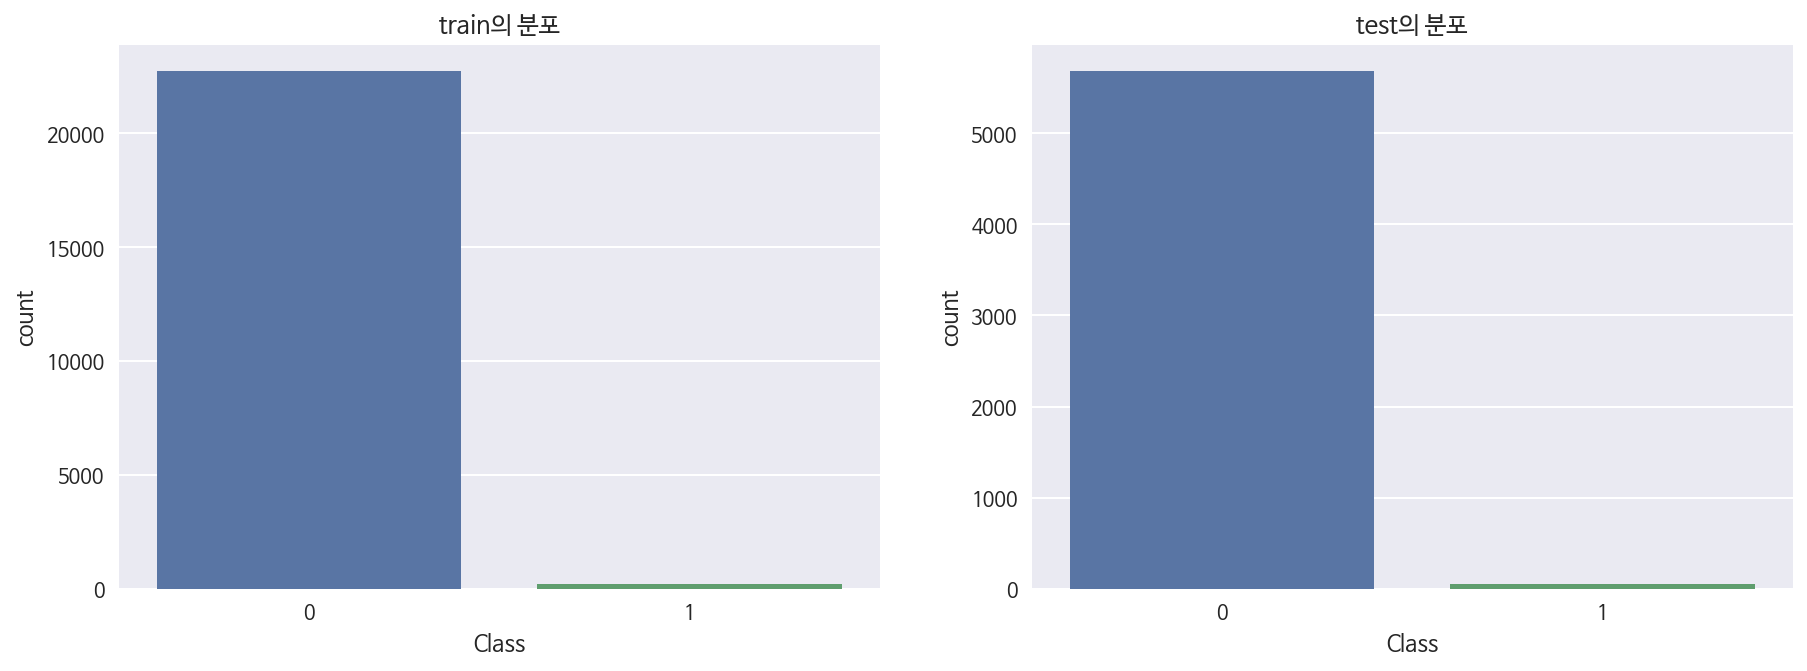

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.countplot(y_train, ax=ax[0])
ax[0].set_title('train의 분포')
sns.countplot(y_test, ax=ax[1])
ax[1].set_title('test의 분포')

train과 test의 target이 동일하게 나누어 졌음을 확인할 수 있다.

## feature의 정규화

기본적으로 로그변환을 제외한 이외의 방법으로 데이터를 스케일링을 해줄때는 train 데이터를 기준으로 해줘야 한다.

따라서 train 데이터를 기준으로 정규화를 시행하겠다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= features.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns= features.columns)

In [ ]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000,22942.000000
mean,0.926686,0.663471,0.882930,0.319687,0.561089,0.493165,0.530188,0.662517,0.622776,0.614620,0.267161,0.799282,0.512659,0.712867,0.500661,0.683648,0.709765,0.695137,0.469569,0.449111,0.441058,0.515345,0.791704,0.407235,0.727485,0.417929,0.394958,0.391850
std,0.062265,0.025812,0.050316,0.084728,0.020232,0.030431,0.019108,0.023287,0.052778,0.031793,0.066871,0.052261,0.132456,0.044248,0.123994,0.051470,0.036742,0.066959,0.083762,0.015419,0.017671,0.043002,0.013344,0.090870,0.056244,0.090105,0.021743,0.012177
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.899298,0.653623,0.858499,0.269460,0.552007,0.476045,0.523603,0.658965,0.592864,0.602023,0.219487,0.782824,0.426971,0.698223,0.421536,0.660664,0.695617,0.658299,0.422841,0.444648,0.436277,0.484009,0.788399,0.353899,0.693259,0.356983,0.390976,0.389670
50%,0.927768,0.663862,0.889474,0.317277,0.560789,0.487133,0.531347,0.662833,0.621067,0.613177,0.264354,0.807267,0.510317,0.716100,0.508413,0.688316,0.709157,0.695663,0.469319,0.447728,0.440304,0.515776,0.791626,0.413327,0.729990,0.407618,0.394903,0.392255
75%,0.967420,0.675343,0.913668,0.361570,0.569692,0.502279,0.537999,0.668071,0.651928,0.627171,0.311502,0.827919,0.600730,0.732758,0.587930,0.711918,0.723882,0.734303,0.516286,0.451824,0.444637,0.545945,0.795029,0.473189,0.765926,0.462893,0.399868,0.395014
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_test.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000,5736.000000
mean,0.926825,0.663714,0.883198,0.321661,0.561034,0.493230,0.530411,0.662771,0.621950,0.614492,0.268009,0.798400,0.511612,0.712393,0.502280,0.685683,0.709633,0.695161,0.470682,0.449222,0.441435,0.514526,0.792004,0.409084,0.728040,0.416931,0.394281,0.391991
std,0.059140,0.023660,0.048645,0.084837,0.018030,0.028863,0.016455,0.021906,0.052041,0.030817,0.067693,0.053688,0.131302,0.045060,0.123621,0.052014,0.039021,0.067208,0.085066,0.013887,0.016326,0.042335,0.010472,0.089048,0.055828,0.090569,0.020913,0.011730
min,0.201454,0.385526,0.152670,0.045187,0.324584,0.368131,0.291056,0.032289,0.265246,0.193171,0.042004,0.054258,0.043134,0.184044,-0.023796,0.002698,-0.042390,-0.005299,0.108726,0.201339,0.310147,0.000000,0.638547,0.044266,0.413307,0.166643,-0.008446,0.225688
25%,0.899595,0.653686,0.859908,0.270363,0.551987,0.476193,0.523694,0.659071,0.592493,0.601436,0.219471,0.782954,0.425431,0.697279,0.422395,0.662518,0.695811,0.657831,0.421301,0.444770,0.436328,0.483854,0.788401,0.356221,0.693305,0.356142,0.390771,0.389754
50%,0.927960,0.663861,0.889343,0.318204,0.560528,0.487225,0.531345,0.662881,0.620027,0.613171,0.265712,0.806788,0.508980,0.716525,0.506931,0.690182,0.708537,0.694879,0.468858,0.447902,0.440419,0.515063,0.791624,0.415293,0.729720,0.406376,0.394768,0.392304
75%,0.966268,0.675458,0.913298,0.364671,0.569707,0.501783,0.538262,0.667838,0.650407,0.627552,0.312944,0.827230,0.598181,0.733175,0.592239,0.713934,0.723583,0.733728,0.517940,0.451878,0.445068,0.545102,0.795051,0.473799,0.766661,0.462235,0.399405,0.395105
max,0.999746,0.878987,0.994709,0.997587,0.696337,0.668013,0.692234,0.928923,0.991844,0.906150,0.876715,0.937117,0.985969,0.888476,0.900099,0.873447,0.945027,0.985724,0.879144,0.626767,1.000000,0.692745,0.973195,0.642570,0.981919,0.984725,0.532898,0.787739


정규화를 통해서 변수간의 전체적인 스케일이 동일해졌다는 것을 확인할 수 있다.

## Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)

pred = lg.predict(X_test)

# 클래스 1로 예측했을 때의 확률 
# AUC의 경우 확률로 성능 지표의 값을 구하기 때문에 확률을 따로 구함
pred_proba_c1 = lg.predict_proba(X_test)[:, -1].reshape(-1,1)

# 평가

불균형한 데이터 셋의 모델의 성능을 증가시키는 방법으로는 크게 임계치를 초정하는 방법과 샘플링을 통해 불균형 데이터의 라벨을 균형을 맞춰주는 방법이 있다.

불균형 데이터를 해소시키는 샘플링은 크게 두 가지로 나눌 수 있다.
* 적은 클래스의 데이터 수를 증가 시키는 Oversampling
* 많은 클래스의 데이터 수를 감소 시키는 Undersampling

대부분 Oversampling 기반의 SMOTE(Synthetic Minority Oversampling Technique) 알고리즘을 통해서 불균형 데이터를 해소하는 편이다.

SMOTE의 기본 개념은 수가 적은 클래스의 점을 하나 선택해 k개의 가까운 데이터 샘플을 찾고 그 사이에 새로운 점을 생성하며 임의의 데이터를 생성하여 데이터 불균형을 해소시키는 것이다.

SMOTE는 데이터의 손실이 없으며 임의 Over 샘플링을 하였을 때 보다 과적합을 완화 시킬 수 있는 장점이 존재한다.

그런데 이번 과제의 경우 SMOTE를 통한 모델 성능의 향상보다 임계치를 조정하여 모델의 성능 평가 지표를 끌어올리는 방법이 주라고 생각하여 SMOTE를 통한 모델 성능 향상 방법은 시행하지 않았다.

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix을 함수로 구현
def get_clf_eval(y_test, y_predict, title):
    tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
    print("-"*90)
    print(f'{title}')
    print("-"*90)
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_predict))
    print("-"*90)
    accuracy = (tp+tn) / (tp+fn+fp+tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    print(f'Accuracy : {accuracy:.5f}, Precision : {precision:.5f}, Recall : {recall:.5f}, F1 : {f1:.5f}')
    print("-"*90)

get_clf_eval(y_test, pred, 'Logistic Regression (임계치 0.5 기준)')

------------------------------------------------------------------------------------------
Logistic Regression (임계치 0.5 기준)
------------------------------------------------------------------------------------------
Confusion Matrix
[[5685    2]
 [  19   30]]
------------------------------------------------------------------------------------------
Accuracy : 0.99634, Precision : 0.93750, Recall : 0.61224, F1 : 0.74074
------------------------------------------------------------------------------------------


sklearn 패키지의 Logistic Regression의 기본 임게치는 0.5이다. 즉 클래스가 1로 예측될 확률이 0.5를 넘는다면 1로 예측한다.

기본 임계치에 따라 현재 구축된 Logistic Regression 모델은
- 0(실제값)을 0(예측값)으로 예측한 TN의 경우 5685개
- 1(실제값)을 1(예측값)로 예측한 TP의 경우 30개
- 0(실제값)을 1(예측값)로 잘 못 에측한 FP의 경우 2개
- 1(실제값)을 0(예측값)로 잘 못 예측함 FN의 경우 19개

의 성능을 가지고 있다.

현재 데이터 세트의 레이블이 매우 불균형하기 때문에 모델에 대한 성능 평가지표로 정확도를 사용하는 것은 좋지않다.

따라서 현재 모델의 성능 평가지표로는 정밀도, 재현율 또는 정밀도와 재현율의 관계를 결합한 F1 Score을 활용하는 것이 더 좋아보인다.

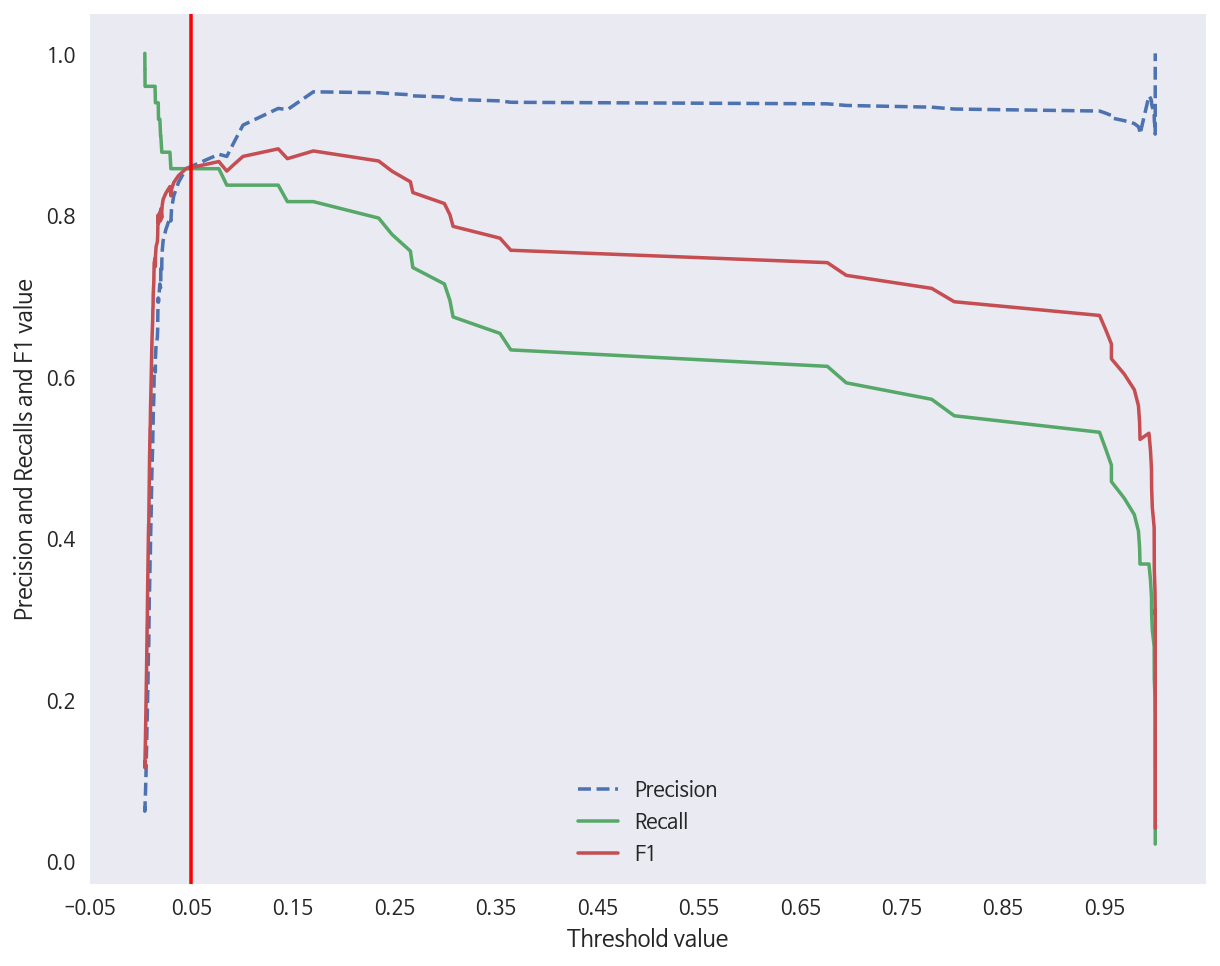

정밀도가 최대인 값 : 1.00000, 최대의 정밀도를 가지는 임계치 : 0.99997
재현율이 최대인 값 : 1.00000, 최대의 재현율을 가지는 임계치 : 0.00425
F1 점수가 최대인 값: 0.88172, 최대의 F1 점수를 가지는 임계치: 0.13574


In [ ]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import precision_recall_curve

# 정밀도와 재현율과 F1스코어을 그래프화 시키기 위한 함수
def precision_recall_curve_plot_and_f1(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    f1 = 2 * (precisions * recalls) / (precisions + recalls)

    plt.figure(figsize=(10,8))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='Precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='Recall')
    plt.plot(thresholds, f1[0:threshold_boundary], linestyle='-', label='F1')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.axvline(x=0.05, c='r')

    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recalls and F1 value')
    plt.legend()
    plt.grid()
    plt.show()
    
    return precisions[0:threshold_boundary], recalls[0:threshold_boundary], f1[0:threshold_boundary], thresholds 

precision, recall, f1, threshold = precision_recall_curve_plot_and_f1(y_test, pred_proba_c1)

precision = precision.tolist()
recall = recall.tolist()
f1 = f1.tolist()
threshold = threshold.tolist()

max_precision = max(precision)
max_precision_idx = precision.index(max_precision)
max_precision_threshold = threshold[max_precision_idx]

max_recall = max(recall)
max_recall_idx = recall.index(max_recall)
max_recall_threshold = threshold[max_recall_idx]

max_f1 = max(f1)
max_f1_idx = f1.index(max_f1)
max_f1_threshold = threshold[max_f1_idx]

print(f'정밀도가 최대인 값 : {max_precision:.5f}, 최대의 정밀도를 가지는 임계치 : {max_precision_threshold:.5f}')
print(f'재현율이 최대인 값 : {max_recall:.5f}, 최대의 재현율을 가지는 임계치 : {max_recall_threshold:.5f}')
print(f'F1 점수가 최대인 값: {max_f1:.5f}, 최대의 F1 점수를 가지는 임계치: {max_f1_threshold:.5f}')

기본적으로 정밀도와 재현율은 trade-off 관계를 가지는데 임계치를 높임으로써 정밀도가 상승하면 재현율은 감소하고 임계치를 낮춤으로써 정밀도가 감소하면 재현율은 증가하는 관계를 가진다. F1_score의 경우에는 정밀도와 재현율이 서로 비슷할 수록 그 값이 높아지는 경향을 보인다.

그런데 정밀도와 재현율이 trade-off관계를 가지는 이유가 무엇일까? 그 이유는 정밀도와 재현율을 구하는 식의 분모를 보면 알 수 있다. 정밀도의 경우 FP를 가지고 있고 재현율의 경우 FN을 가지고 있다. 따라서 임계치를 높여서 모든 값을 0으로 예측한다면 FN값이 증가하고 FP값이 감소하여 정밀도는 증가하고 재현율은 감소할 것이다. 이렇게 임계치를 높이면 정밀도는 증가하고 재현율은 감소하게 된다. 따라서 가장 좋은 성능을 가지는 지표는 정밀도, 재현율, F1 값이 모두 높은 모델이며 이러한 정밀도와 재현율의 trade-off 관계 속에 정밀도와 재현율의 성능을 모두 높이는 방법은 모델 자체의 성능을 좋게 만들어 그래프를 위의 방향으로 끌어 올리는 것이다.

그러면 어떠한 성능 평가지표를 기준으로 평가를 내리는 것이 좋을까? 정밀도와 재현율 중 더 좋은 성능 평가 지표를 나눌 수 없으며 예측하는 데이터의 종류에 따라서 중요한 성능 평가지표가 달라진다. 예를 들어 재현율의 경우 암진단처럼 실제는 암이 걸렸지만(실제값1) 암이 아니라고(예측값0) 했을 때 처럼 실제 Positive 데이터를 Negative 데이터로 잘못 판단하게 되면 큰 일이 발생하는 경우이다. 정밀도의 경우 재현율과 반대의 경우에 중요해진다. 

현재 모델의 경우 신용카드 사기 적발을 제대로 예측해야 하는 상황이다. 따라서 실제 Positive 데이터, 즉 사기인 카드를 Negative 데이터, 사기가 아니다라고 잘못 판단하게 되면 기업 입장에서는 더 큰 손실이 발생하기 때문에 재현율이 중요한 경우이다.

그렇다면 위에 결과처럼 임계치를 0.00425로 설정해서 재현율을 1로 만드는 것이 제일 좋은 것일까? 이것은 또 아니라고 할 수 있다. 재현율을 1로 만든다는 것은 그만큼 사기가 아닌 카드를 사기인 카드로 예측하여 정밀도가 0과 가까운 값을 가지며 고객에게 큰 불편을 가져다 줄 것이다. 그래서 임계치를 매우 낮춰 재현율을 1로 만드는 것은 숫자 놀음에 불과한 좋지않은 방식이라고 생각한다. 

따라서 나는 재현율에 가중치를 두지만 상대적으로 정밀도도 챙길 수 있는 두 지점이 서로 교차하는 임계치 0.05를 기준으로 모델을 만드는 것이 합당하다고 생각한다. 또한 이 지점의 F1_Score 값 또한 0.8 이상을 보인다. 현재 모델의 성능 평가지표를 위 방향으로 이동시키기 위해서는 모델 그 자체의 성능을 끌어올려야 한다. 예를 들어 다른 분류모델을 만들어 활용하거나 새로운 데이터를 추가하는 등의 방법이 존재한다.

결론은 현재 모델의 경우 재현율과 정밀도가 서로 교차하는 지점인 임계치 0.05를 기준으로 모델을 활용하는 것이 좋다고 생각된다. 

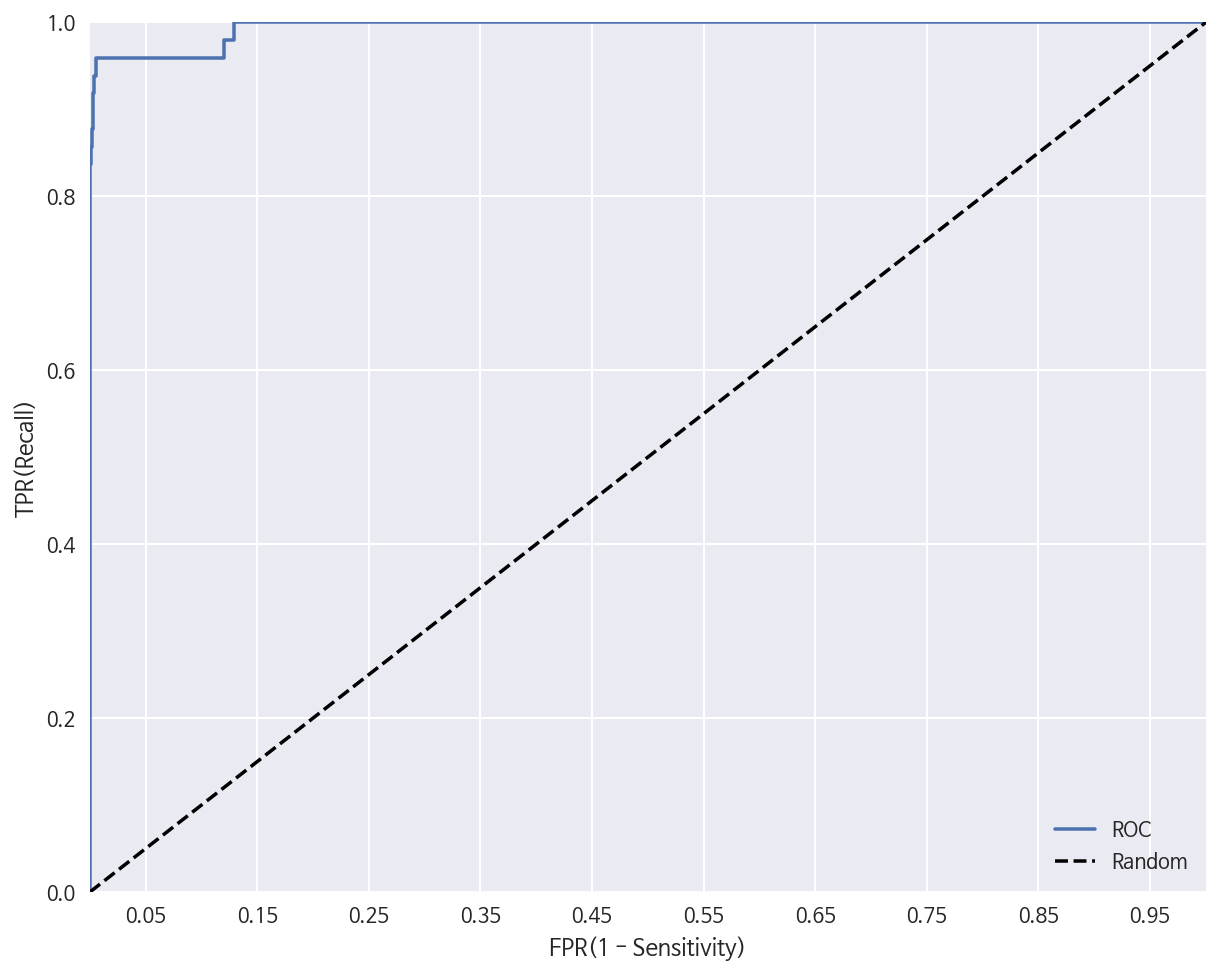

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import roc_curve

# ROC curve and AUC Score를 그래프로 나타내기 위한 함수
def roc_curve_plot(y_test, pred_proba_c1):
    FPRs, TPRs, thresholds = roc_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(10,8))
    # ROC 곡선을 그림
    plt.plot(FPRs, TPRs, label='ROC')
    # 가운데 대각선을 그림
    plt.plot([0,1], [0,1], 'k--', label = 'Random')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, pred_proba_c1)

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, pred_proba_c1)
print(f'AUC Score : {auc:.5f}')

AUC Score : 0.99433


AUC Score의 경우 1에 가까울수록 성능이 좋다고 할 수 있으며 0.9943의 높은 값을 보이고 있다. 하지만 AUC Score보다는 재현율과 정밀도를 고려하여 모델의 성능을 평가하는 것이 현재 데이터셋에는 더 좋다고 생각된다.

참고자료
- 파이썬 머신러닝 완벽가이드(권철민)